In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

df = pd.read_csv("../../data/netflix_data.csv")

In [4]:
features = [
    'IMDb Score',
    'Rotten Tomatoes Score',
    'Metacritic Score',
    'Awards Received',
    'Awards Nominated For',
    'IMDb Votes',
    'Boxoffice_cleaned'
]

X = df[features].copy() 

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=features)

In [5]:
N = 3
kmeans = KMeans(n_clusters=N, random_state = 1)
df['Cluster'] = kmeans.fit_predict(X_scaled)

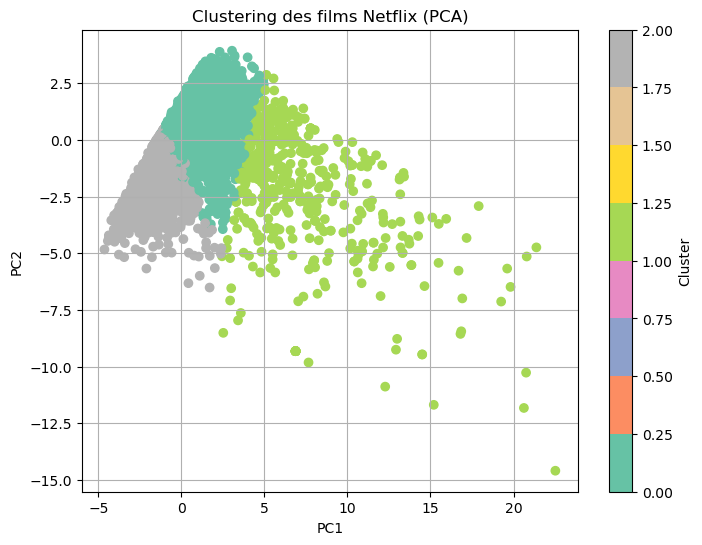

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1], c=df['Cluster'], cmap='Set2')
plt.title('Clustering des films Netflix (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

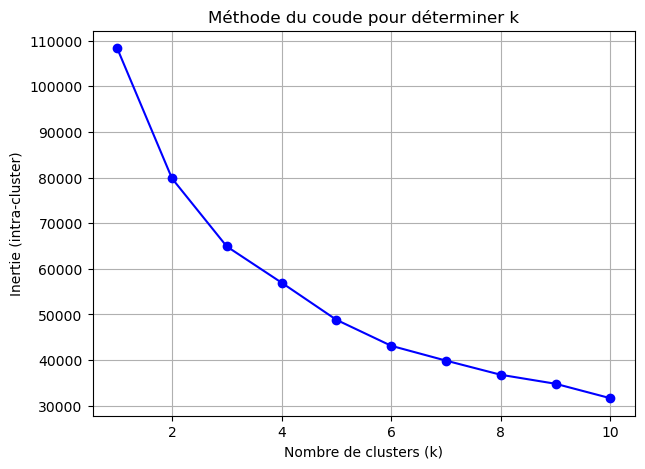

In [7]:
inertie = []
K = range(1, 11)

for k in K :
    kmeans = KMeans(n_clusters=k, random_state = 1)
    kmeans.fit(X_scaled)
    inertie.append(kmeans.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K, inertie, 'bo-')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (intra-cluster)")
plt.title("Méthode du coude pour déterminer k")
plt.grid(True)
plt.show()

In [8]:
composantes = pca.components_.T # (variables, composantes)
features = X_scaled.columns
df_contributions = pd.DataFrame({
    'PC1': composantes[:, 0],
    'PC2': composantes[:, 1] 
}, index=features)

print(df_contributions.abs().sort_values(by='PC1', ascending=False))

                            PC1       PC2
Awards Nominated For   0.463409  0.202350
Awards Received        0.462825  0.170107
IMDb Votes             0.399681  0.393463
Metacritic Score       0.383920  0.426857
Rotten Tomatoes Score  0.346860  0.514267
IMDb Score             0.299937  0.323659
Boxoffice_cleaned      0.231585  0.473151


In [9]:
print(df_contributions.abs().sort_values(by='PC2', ascending=False))

                            PC1       PC2
Rotten Tomatoes Score  0.346860  0.514267
Boxoffice_cleaned      0.231585  0.473151
Metacritic Score       0.383920  0.426857
IMDb Votes             0.399681  0.393463
IMDb Score             0.299937  0.323659
Awards Nominated For   0.463409  0.202350
Awards Received        0.462825  0.170107


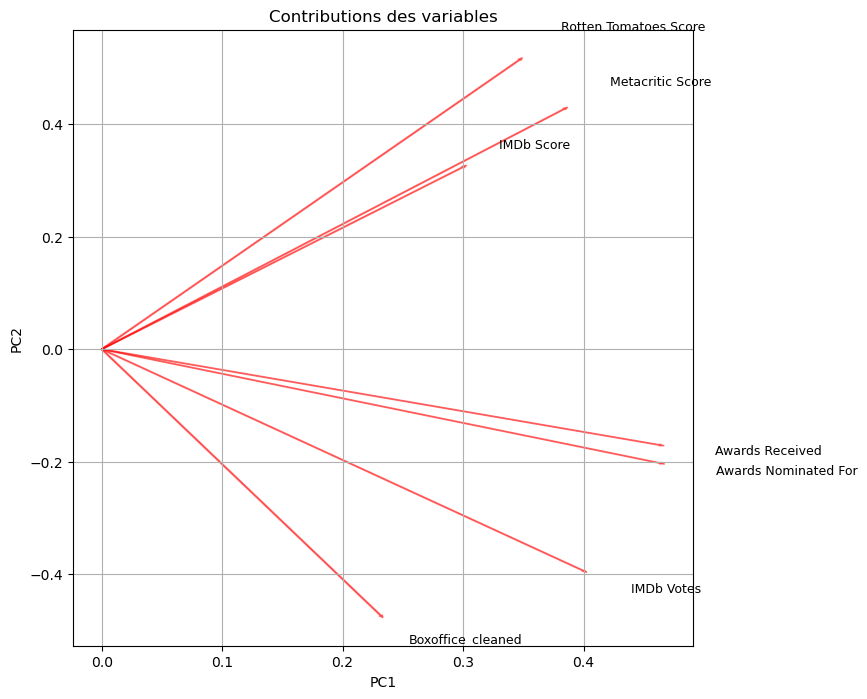

In [10]:
plt.figure(figsize=(8, 8))
for i in range(len(features)):
    plt.arrow(0, 0, df_contributions.iloc[i, 0], df_contributions.iloc[i, 1], color='r', alpha=0.5)
    plt.text(df_contributions.iloc[i, 0]*1.1, df_contributions.iloc[i, 1]*1.1, features[i], fontsize=9)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Contributions des variables")
plt.grid()
plt.show()

# Analyse des clusters

In [11]:
df['Cluster'] = KMeans(n_clusters=3, random_state=1).fit_predict(X_scaled)

# Moyenne des variables pour chaque cluster
cluster_summary = df.groupby('Cluster')[features].mean().round(2)
print(cluster_summary)

         IMDb Score  Rotten Tomatoes Score  Metacritic Score  Awards Received  \
Cluster                                                                         
0              6.88                  64.74             58.61             2.42   
1              7.68                  82.17             74.66            48.15   
2              5.22                  41.36             49.30             0.83   

         Awards Nominated For  IMDb Votes  Boxoffice_cleaned  
Cluster                                                       
0                        4.73    28487.30       4.267108e+07  
1                       96.15   491218.53       1.397318e+08  
2                        2.14    28294.89       4.272844e+07  


In [12]:
cluster_0 = df[df['Cluster']==0]
cluster_1 = df[df['Cluster']==1]
cluster_2 = df[df['Cluster']==2]

In [13]:
cluster_0['Genre'].value_counts().sort_values(ascending=False)

Genre
Unknown                                                   1702
Drama                                                      825
Comedy                                                     715
Documentary                                                424
Drama, Romance                                             335
                                                          ... 
Drama, Crime, Action                                         1
Biography, Comedy, Crime, Drama                              1
Documentary, Drama, Music                                    1
Animation, Comedy, Family, Fantasy, Mystery                  1
Animation, Action, Adventure, Fantasy, Sport, Thriller       1
Name: count, Length: 1484, dtype: int64

In [14]:
cluster_1['Genre'].value_counts().sort_values(ascending=False)

Genre
Drama                                               29
Action, Adventure, Sci-Fi                           25
Drama, Romance                                      16
Crime, Drama, Thriller                              16
Action, Adventure, Fantasy, Sci-Fi                  15
                                                    ..
Action, Crime, Mystery, Sci-Fi, Thriller             1
Biography, Drama, Music, Romance                     1
Adventure, Biography, Drama                          1
Fantasy, Horror, Mystery                             1
Action, Adventure, Crime, Drama, Mystery, Sci-Fi     1
Name: count, Length: 180, dtype: int64

In [15]:
cluster_2['Genre'].value_counts().sort_values(ascending=False)

Genre
Comedy                                          463
Comedy, Romance                                 178
Drama                                           159
Comedy, Drama                                   116
Comedy, Drama, Romance                          100
                                               ... 
Action, Comedy, Romance, Thriller                 1
Adventure, Comedy, Drama, Romance                 1
Mystery, Romance, Thriller                        1
Animation, Adventure, Comedy, Crime, Family       1
Adventure, Drama, Fantasy, Romance, Thriller      1
Name: count, Length: 705, dtype: int64

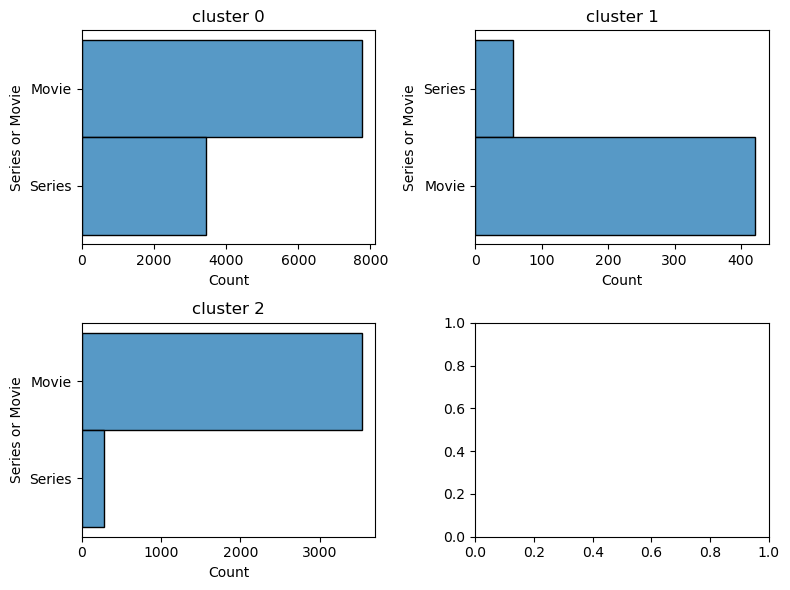

In [16]:
import seaborn as sns
from seaborn import histplot

fig, axes = plt.subplots(2, 2, figsize=(8,6))

metrics = 'Series or Movie'
axes = axes.flatten()

sns.histplot(y=cluster_0['Series or Movie'], ax=axes[0])
axes[0].set_title('cluster 0')
sns.histplot(y=cluster_1['Series or Movie'], ax=axes[1])
axes[1].set_title('cluster 1')
sns.histplot(y=cluster_2['Series or Movie'], ax=axes[2])
axes[2].set_title('cluster 2')

plt.tight_layout()
plt.show()

In [17]:
#df.to_csv("../../data/netflix_clusters.csv")